# Airbnb Business Analysis


### Development Team Project: Python notebook



<a id = "table-of-content"></a>
# Table of Contents

- [Business Understanding](#business_undestanding)
- [Data Pre-processing](#data_preprocessing)
- [Exploratory Data Analysis](#exploratory_data_analysis)
- [Statistical Analysis](#statistical_analysis)
- [Modelling and Evaluation](#modelling_n_evaluation)
- [Conclusion](#conclusion)

<a id = "business_undestanding"></a>
# 1. Business Understanding

Business Analytical Question - What are the key determinants of pricing for Airbnb listings in NYC? How do factors like location, property type, and reviews influence the price?

### Initial Data Inspection
To start understanding our dataset, we will:

1. **Load the dataset** 
2. **Examine the structure** 
3. **Get a statistical summary** 
4. **Check the dataset size**

These steps are crucial for gaining an initial understanding of the dataset's characteristics, guiding further analysis and preprocessing.


In [1]:
#import data manipulation, visualisation and machine learning libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline
# Set the aesthetics for the plots
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:

#read data and view summary statistics of numerical variables
df = pd.read_csv('AB_NYC_2019.csv')
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:
#inspect data
df.head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#number of rows and columns
df.shape

(48895, 16)

In [5]:
#column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#check data types
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# 2. Data Pre-processing

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [8]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)

In [9]:
#Dropping id, host_name and last_review columns as we will not be using these.
df.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace =True)

In [10]:
#There are a small number of rows where price is registered as 0. These rows are being removed on the assumption that a listing being offered for free is highly improbable.
print(df[df['price'] <= 0].size)
# Drop rows where the price is 0
df = df[df['price'] != 0]

132


In [11]:
#checking 
missing_values = df.isnull().sum()
print(missing_values)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [12]:
#check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [13]:
#Inspecting categorical variables, starting with count of neighbourhood groups
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64

In [14]:
#Inspecting counts of neighbourhoods and length
df.neighbourhood.value_counts()

neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Richmondtown             1
New Dorp                 1
Rossville                1
Woodrow                  1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [15]:
#Inspecting counts of room types
df.room_type.value_counts()

room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
Name: count, dtype: int64

<a id = "exploratory_data_analysis"></a>
# 3. Exploratory Data Analysis
EDA is a critical step in the data science process, focusing on investigating and summarising the main characteristics of a dataset.

We will try and look at the distribution of the columns below but also their relationship with price. 

* host_id
* neighbourhood_group
* neighbourhood 
* latitude 
* longitude 
* room_type 
* price
* number_of_reviews 



### Price

In [16]:
# Calculate summary statistics for price
price_description = df['price'].describe()

price_description


count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

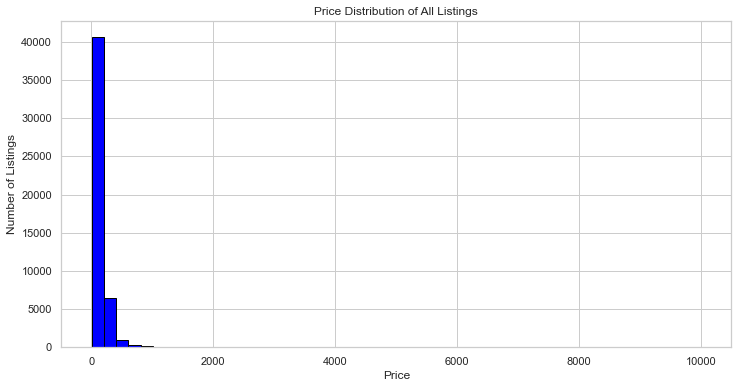

In [17]:
#Distribution of prices
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, color='blue', edgecolor='black')
plt.title('Price Distribution of All Listings')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()


From the summary statistics and distribution analysis, it's evident that there are extreme outliers in the dataset. While the average value is around 152, there are instances with values as high as 10,000. To address this, we need to either standardize or cap these extreme values. First, let's determine the count of these outliers, which will help us decide the best course of action.


In [18]:
# Count how many price values are above $500 and see what proportion this is to total dataset. 
extreme_count = df[df['price'] > 500]['price'].count()
print("Number of listings with price over $500:", extreme_count)
total_count = df.shape[0]
# Proportion of listings over £500
proportion = extreme_count / total_count
print("Proportion of listings with price over $500:", proportion)


Number of listings with price over $500: 1044
Proportion of listings with price over $500: 0.02135668112265772


Our analysis reveals that only 2% of the values exceed $500. To prevent these outliers from skewing our analysis, we have decided to cap the price at $500. This approach will ensure a more accurate representation of the dataset's overall trends and characteristics.

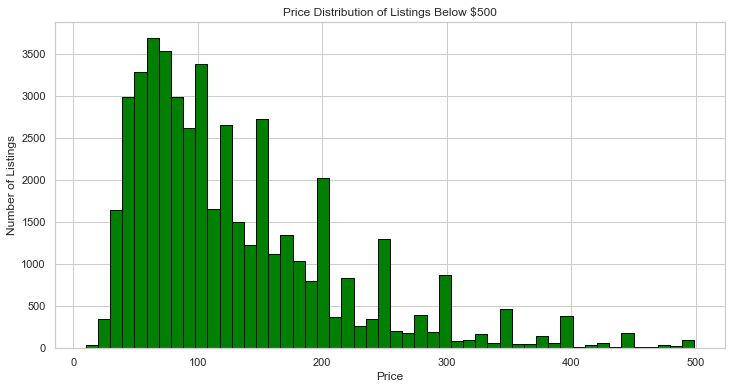

In [19]:
#Distribution of prices below $500
plt.figure(figsize=(12, 6))
plt.hist(df[df['price'] < 500]['price'], bins=50, color='green', edgecolor='black')
plt.title('Price Distribution of Listings Below $500')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()


### Host ID

In [20]:
#Looking at the top 10 hosts with most listings.
top_hosts = df.host_id.value_counts().head(10)
top_hosts

host_id
219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

### Neighbourhood Groups

In [21]:
#Count occurence of each Neighbourhood group
neighbourhood_counts = df['neighbourhood_group'].value_counts()
neighbourhood_counts


neighbourhood_group
Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64

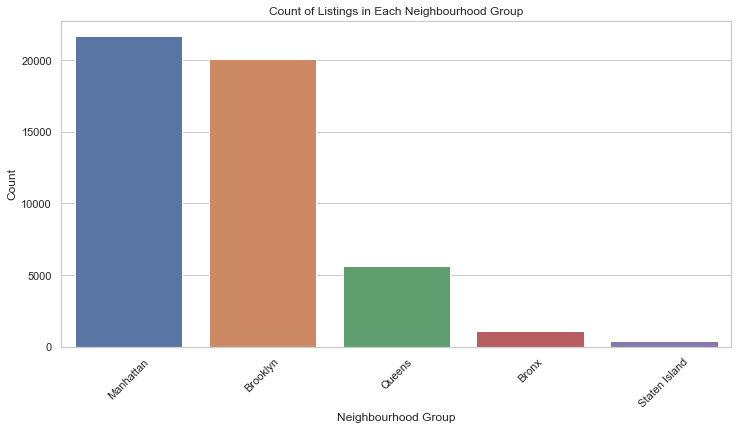

In [22]:
#Visualising counts of listings in each neighbourhood group
plt.figure(figsize=(12, 6))  
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, hue=neighbourhood_counts.index, palette='deep', legend=False)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Count of Listings in Each Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Filter dataset for each neighbourhood group and calculate summary statistics for price.
neighbourhood_groups = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
stat_df_list = []

for group in neighbourhood_groups:
    price_data = df[df['neighbourhood_group'] == group]['price']
    summary = price_data.describe(percentiles=[.25, .50, .75]).iloc[3:]
    summary.name = group  # Name the Series with the group name
    stat_df_list.append(summary)

# Combine the summaries into a single Dataframe
stat_df = pd.concat(stat_df_list, axis=1)
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
min,10.0,10.0,10.0,13.0,10.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


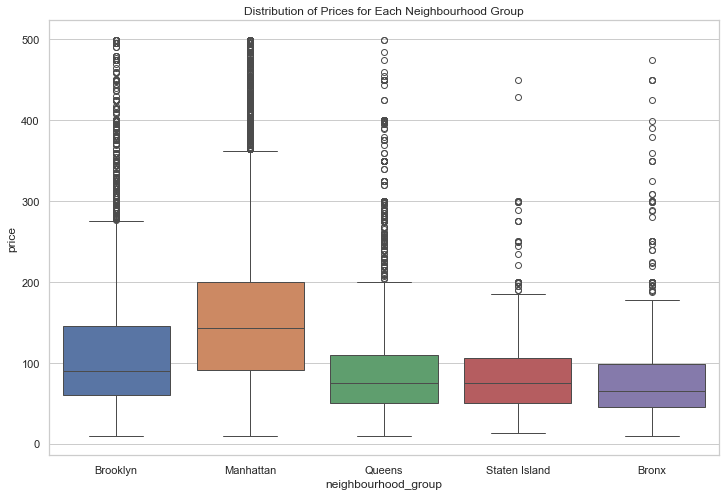

In [24]:
# We want to plot the boxplots of price distribution, as can be seen above their are extreme values so we will remove these in the visualisation and focus on listings below $500.

# Creating a sub-dataframe with prices less than $500
filtered_df = df[df.price < 500]

# Using boxplot to showcase the distribution of prices by neighbourhood group
plt.figure(figsize=(12, 8))
price_dist = sns.boxplot(data=filtered_df, x='neighbourhood_group', y='price', palette='deep')  # You can choose any palette like 'viridis', 'Set2', 'rainbow', etc.
price_dist.set_title('Distribution of Prices for Each Neighbourhood Group')
plt.show()


### Neighbourhood

In [25]:
#Top 10 neighbourhoods with most listings
top_neighbourhoods = df.neighbourhood.value_counts().head(10)
top_neighbourhoods


neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

In [26]:
#Average price of neighbourhoods with most listings
top_neighbourhoods = top_neighbourhoods.index
avg_price_per_neighbourhood = df[df['neighbourhood'].isin(top_neighbourhoods)].groupby('neighbourhood')['price'].mean()
avg_price_per_neighbourhood


neighbourhood
Bedford-Stuyvesant    107.794340
Bushwick               84.903737
Crown Heights         112.480179
East Village          186.083108
Harlem                118.974041
Hell's Kitchen        204.794178
Midtown               282.719094
Upper East Side       188.948276
Upper West Side       210.918316
Williamsburg          143.839500
Name: price, dtype: float64

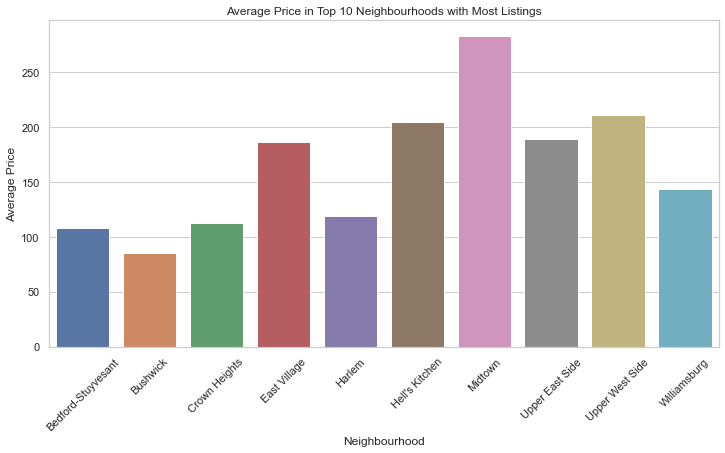

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_neighbourhood.index, y=avg_price_per_neighbourhood.values, palette= 'deep')
plt.xticks(rotation=45)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Average Price in Top 10 Neighbourhoods with Most Listings')
plt.show()

### Room Type

Text(0.5, 1.0, 'Count of Room Types')

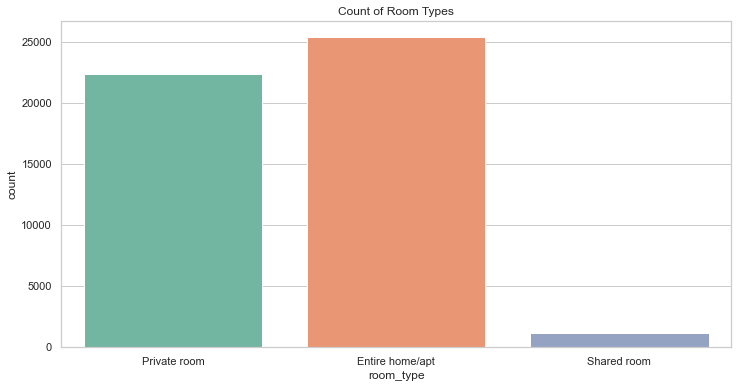

In [28]:
#Counts of different room types
plt.figure(figsize=(12,6))
sns.countplot(x="room_type", data=df, palette = 'Set2')
plt.title( 'Count of Room Types')

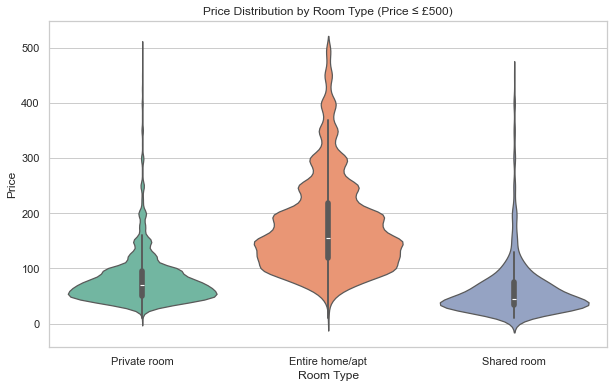

In [29]:
#Violin plot to show distribution of prices by room type
plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=filtered_df, palette = 'Set2')
plt.title('Price Distribution by Room Type (Price ≤ £500)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

### Location

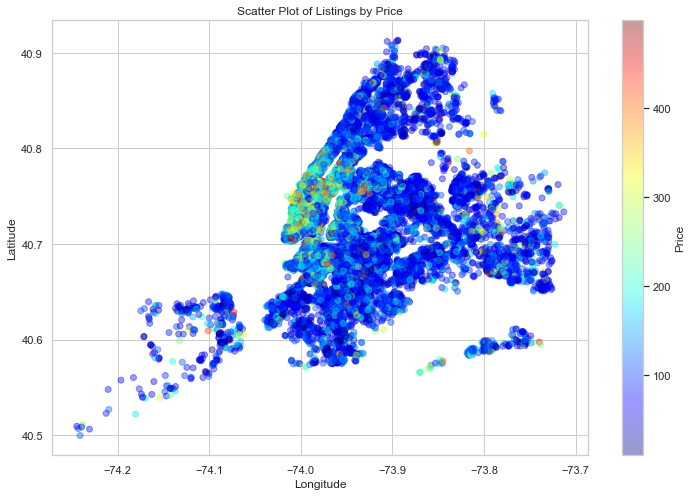

In [30]:
#Examining how price differes around longitutde and lattitude
# Create a figure for the scatter plot
plt.figure(figsize=(12, 8))

# Creating the scatter plot
# 'c' is used for color mapping based on the 'price' column
scatter = plt.scatter(filtered_df['longitude'], filtered_df['latitude'], 
                      c=filtered_df['price'], cmap='jet', alpha=0.4)

# Adding a colorbar to represent the price
plt.colorbar(scatter, label='Price')

# Adding labels and title to the plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Listings by Price')

# Displaying the plot
plt.show()

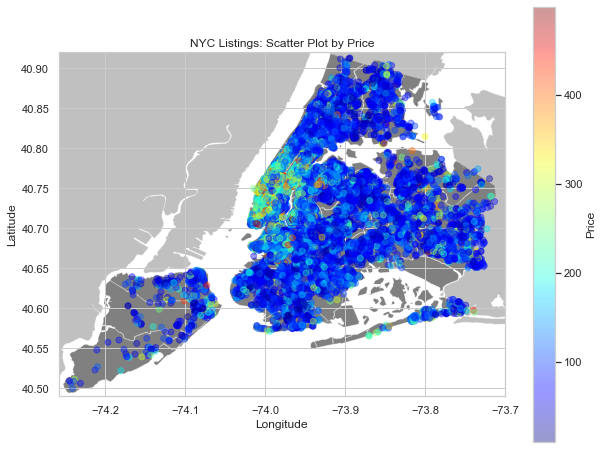

In [31]:
#Mapping scatter graph onto a map of New York
import urllib.request

# URL of the image
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'

# Download the image and save it locally
file_path = 'nyc_map.png'
urllib.request.urlretrieve(url, file_path)

# Loading the NYC image from the saved file
nyc_img = plt.imread(file_path)

# Create a figure
plt.figure(figsize=(10, 8))

# Display the image
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

# Creating the scatter plot
scatter = plt.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df['price'],
                      cmap='jet', alpha=0.4, zorder=5)

# Adding a colorbar for the price
plt.colorbar(scatter, label='Price')

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Listings: Scatter Plot by Price')

# Display the plot
plt.show()


### Number of Reviews

In [32]:
#Listings with most reviews
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [33]:
#Average price per night for most reviewed listings
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


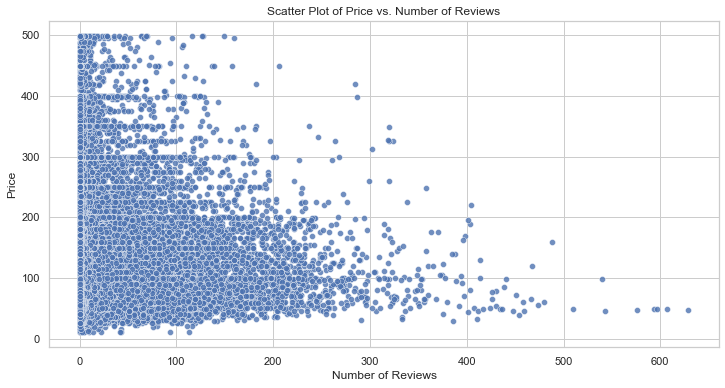

In [34]:
# Scatter plot number of reviews vs price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=filtered_df, alpha = 0.8)
plt.title('Scatter Plot of Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

### Correlation heatmap for continuous variables

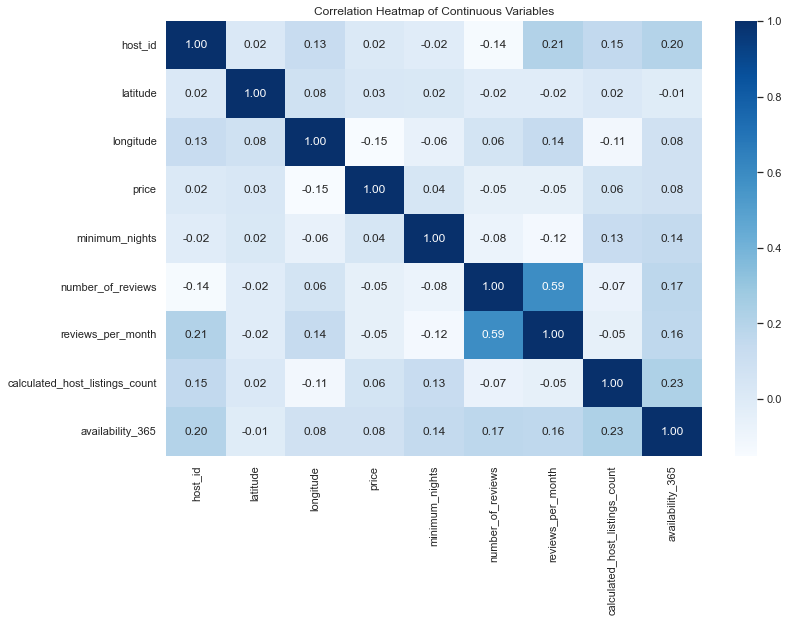

In [35]:
# Selecting only continuous (numerical) variables
continuous_vars = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = continuous_vars.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()

# 4. Modelling 

K-means Clustering

In [36]:
# Separating continuous and categorical data
continuous_features = filtered_df[['latitude', 'longitude', 'price', 'number_of_reviews']]
categorical_features = filtered_df[['neighbourhood_group', 'neighbourhood', 'room_type']]

# Standardizing the continuous features
scaler = StandardScaler()
continuous_features_scaled = scaler.fit_transform(continuous_features)

# One-hot encoding the categorical features
encoder = OneHotEncoder(sparse=False)
categorical_features_encoded = encoder.fit_transform(categorical_features)

# Combining processed continuous and categorical data
processed_data = np.hstack((continuous_features_scaled, categorical_features_encoded))

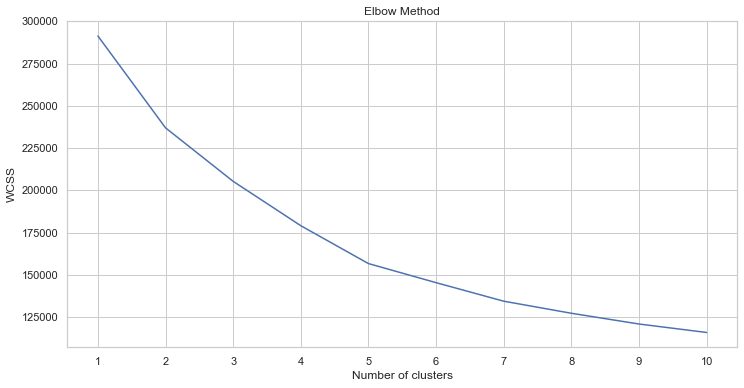

In [50]:
#Using elbow method to determine the best value for k (how many clusters) in k means clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(processed_data)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show()

As can be seen from above, the curve is steepest from 1 to 2 so 2 would be the opitmal number for clusters. 

In [45]:
# After determining the optimal number of clusters from the plot, assign it to k and fit model
k = 2  

kmeans_final = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_final.fit(processed_data)

# Cluster labels
cluster_labels = kmeans_final.labels_

# Retrieve the centroids
centroids = kmeans_final.cluster_centers_

all_feature_names = continuous_features.columns.tolist() + encoder.get_feature_names_out().tolist()
centroids_df = pd.DataFrame(centroids, columns=all_feature_names)
print("Centroids of Clusters:\n", centroids_df)

# Adding cluster labels to your original DataFrame
filtered_df.loc[:, 'Cluster'] = cluster_labels




Centroids of Clusters:
    latitude  longitude     price  number_of_reviews  \
0  0.691321  -0.369307  0.401906          -0.055132   
1 -0.667453   0.356556 -0.388030           0.053228   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                   0.043963                      0.037512   
1                   0.002145                      0.781174   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                       0.885884                    0.030590   
1                       0.000825                    0.202698   

   neighbourhood_group_Staten Island  neighbourhood_Allerton  ...  \
0                           0.002051            1.794412e-03  ...   
1                           0.013158            1.181780e-17  ...   

   neighbourhood_Williamsbridge  neighbourhood_Williamsburg  \
0                  1.666239e-03                    0.015936   
1                  4.412703e-17                    0.143340   

   neighbourhood_Willowbrook  ne

In [39]:
# Calculate average price for each cluster
average_price_per_cluster = filtered_df.groupby('Cluster')['price'].mean()
print("Average Price per Cluster:\n", average_price_per_cluster)

# Calculate other statistics like average number of reviews per cluster
average_reviews_per_cluster = filtered_df.groupby('Cluster')['number_of_reviews'].mean()
print("\nAverage Number of Reviews per Cluster:\n", average_reviews_per_cluster)



Average Price per Cluster:
 Cluster
0    164.286520
1     97.064965
Name: price, dtype: float64

Average Number of Reviews per Cluster:
 Cluster
0    21.117496
1    25.979871
Name: number_of_reviews, dtype: float64


In [40]:

# Most common room type per cluster
most_common_room_type = filtered_df.groupby('Cluster')['room_type'].agg(lambda x: x.value_counts().index[0])
print("\nMost Common Room Type per Cluster:\n", most_common_room_type)

# Most common neighbourhood per cluster
most_common_neighbourhood = filtered_df.groupby('Cluster')['neighbourhood'].agg(lambda x: x.value_counts().index[0])
print("\nMost Common Neighbourhood per Cluster:\n", most_common_neighbourhood)



Most Common Room Type per Cluster:
 Cluster
0    Entire home/apt
1       Private room
Name: room_type, dtype: object

Most Common Neighbourhood per Cluster:
 Cluster
0                Harlem
1    Bedford-Stuyvesant
Name: neighbourhood, dtype: object


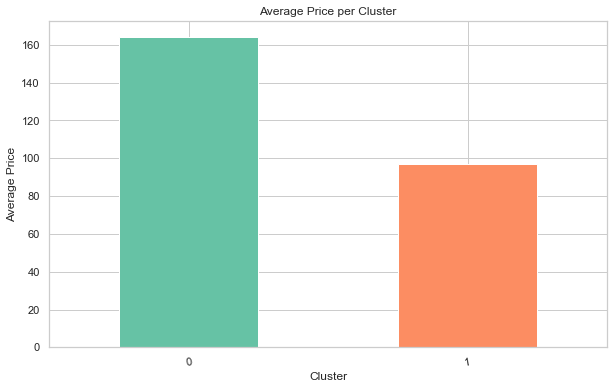

In [41]:
# Setting the size of the plot
plt.figure(figsize=(10, 6))  # You can adjust the dimensions as needed

# Plotting the average price per cluster with a color palette
palette = plt.get_cmap('Set2')  # This is an example palette, you can choose others
average_price_per_cluster.plot(kind='bar', color=[palette(i) for i in range(len(average_price_per_cluster))])

# Setting the title and labels
plt.title('Average Price per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Price')

# Rotating x-axis labels for better readability
plt.xticks(rotation=10)  # Rotates labels by 45 degrees

# Display the plot
plt.show()


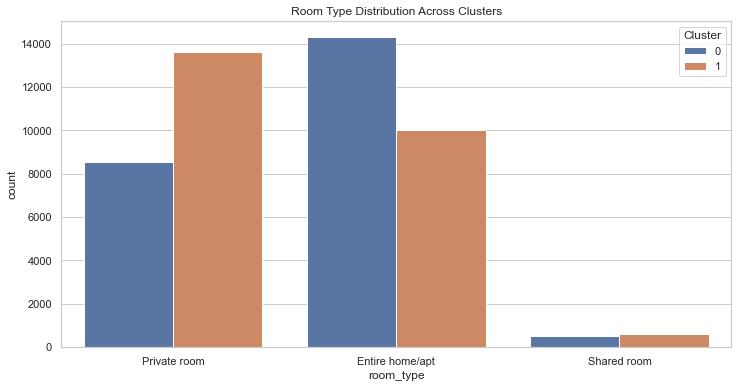

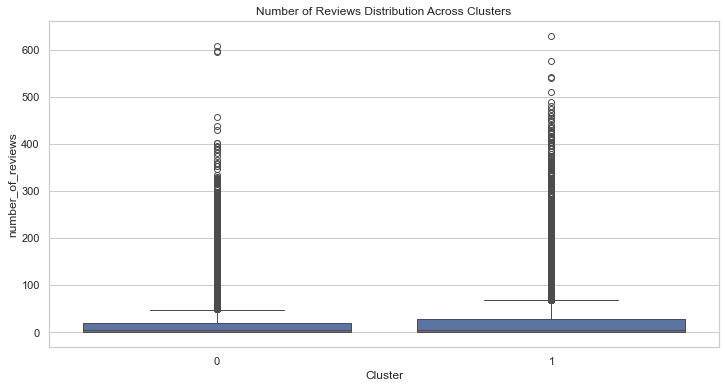

In [42]:
# Compare room types between clusters
plt.figure(figsize=(12,6))
sns.countplot(x='room_type', hue='Cluster', data=filtered_df)
plt.title('Room Type Distribution Across Clusters')
plt.show()

# Compare the distribution of number of reviews
plt.figure(figsize=(12,6))
sns.boxplot(x='Cluster', y='number_of_reviews', data=filtered_df)
plt.title('Number of Reviews Distribution Across Clusters')
plt.show()

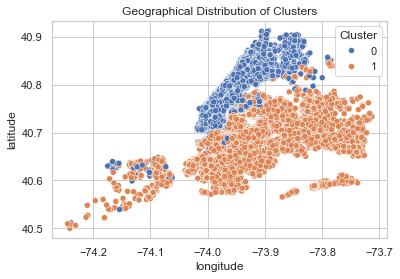

In [46]:
# Geographical distribution (if latitude and longitude are available)
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=filtered_df)
plt.title('Geographical Distribution of Clusters')
plt.show()

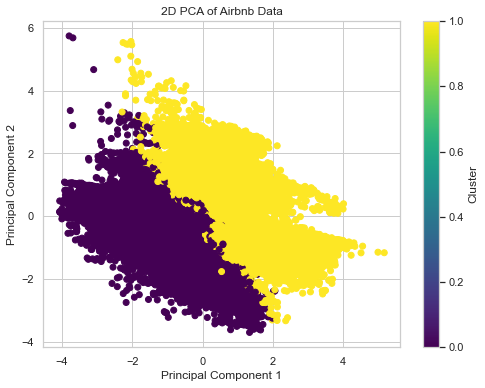

In [47]:
from sklearn.decomposition import PCA

# Principal Component Analysis
pca = PCA(n_components=2)  # Reduce data to 2 components for visualization
principal_components = pca.fit_transform(processed_data)

# Creating a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels  # Add cluster labels for color-coding

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Airbnb Data')
plt.colorbar(label='Cluster')
plt.show()



In [51]:

# Create dataframe to load PCA loadings
loadings_df = pd.DataFrame(data=pca_loadings, columns=all_feature_names, index=['PC1', 'PC2'])

# Displaying the loadings
print(loadings_df)



     latitude  longitude     price  number_of_reviews  \
PC1 -0.231384   0.537880 -0.653745           0.129923   
PC2 -0.832118  -0.349931  0.102756          -0.032034   

     neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
PC1                   0.011212                      0.147280   
PC2                  -0.044926                      0.311476   

     neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
PC1                      -0.260707                    0.106698   
PC2                      -0.207097                   -0.077235   

     neighbourhood_group_Staten Island  neighbourhood_Allerton  ...  \
PC1                          -0.004483                0.000561  ...   
PC2                           0.017781               -0.002068  ...   

     neighbourhood_Williamsbridge  neighbourhood_Williamsburg  \
PC1                      0.000460                    0.013548   
PC2                     -0.002047                    0.036372   

     neighbourhood_Willowb